In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ngocyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ngocyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ngocyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ngocyen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
train = pd.read_csv("../data/INNOVATION_FINAL_TRAIN.csv")
test = pd.read_csv("../data/INNOVATION_FINAL_TEST.csv")

train['sentiment'] = train['sentiment'].apply(lambda x: 2 if x == "positive" else (0 if x == "negative" else 1))
test['sentiment'] = test['sentiment'].apply(lambda x: 2 if x == "positive" else (0 if x == "negative" else 1))

Processing data...
Creating word clouds...


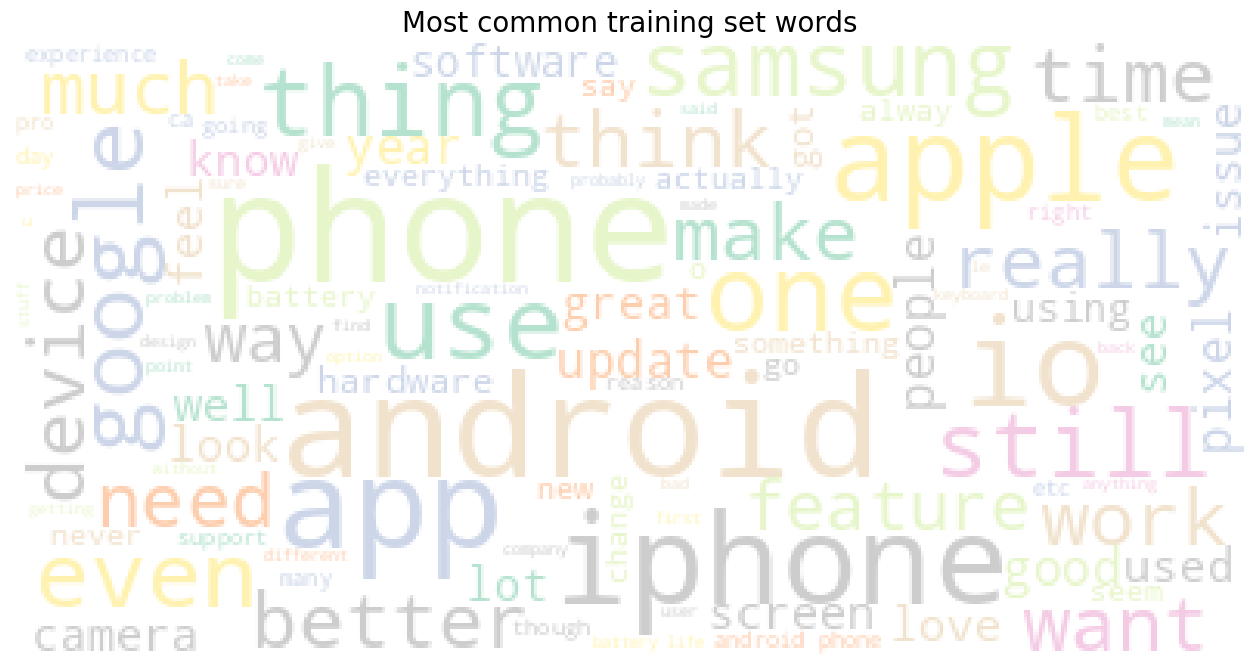

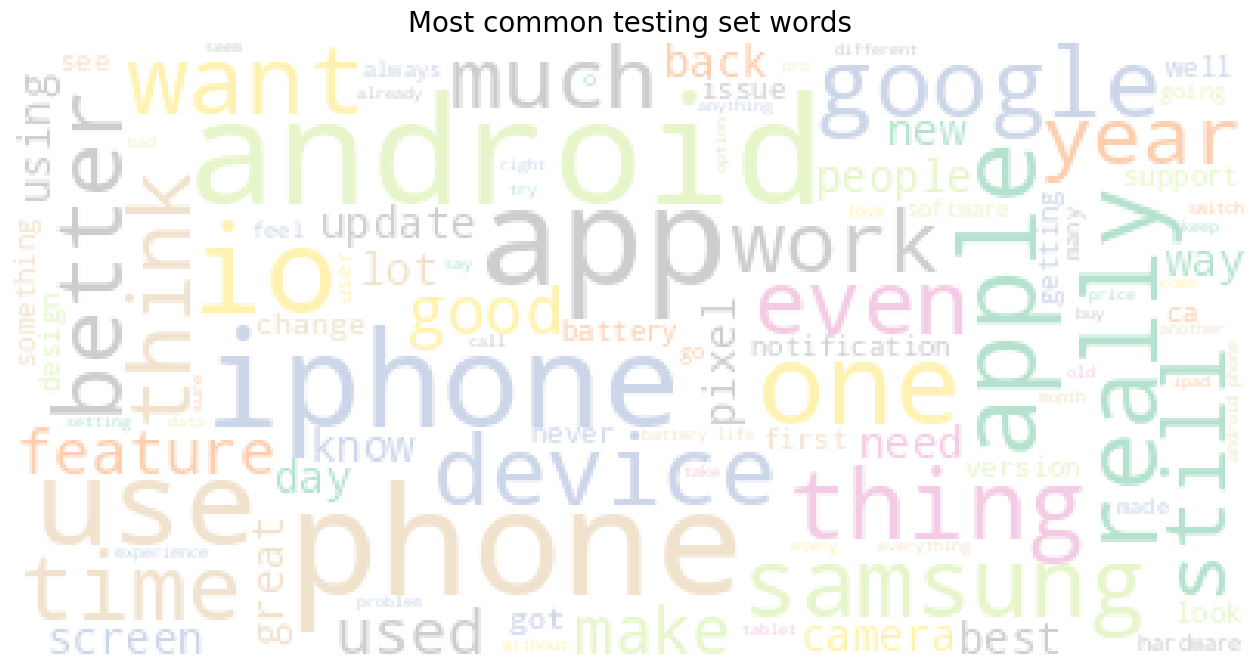

In [11]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text
def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')
    
print("Processing data...")
train['clean']=train['Content'].map(clean)
train['clean_text']=train['clean'].apply(lambda x: " ".join([str(word) for word in x]))

test['clean']=test['Content'].map(clean)
test['clean_text']=test['clean'].apply(lambda x: " ".join([str(word) for word in x]))

print("Creating word clouds...")
word_train =" ".join(train['clean_text'].values)
word_test =" ".join(test['clean_text'].values)

generate_wordcloud(word_train,"training set")
generate_wordcloud(word_test,"testing set")

In [12]:
!pip install text2emotion
import text2emotion as te

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ngocyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ngocyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ngocyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
!pip install emoji==1.7

In [14]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/ngocyen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
train['emotion'] = train['Content'].apply(lambda x: te.get_emotion(x))

In [16]:
train['emotion']

0        {'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.0,...
1        {'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...
2        {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
3        {'Happy': 0.0, 'Angry': 0.12, 'Surprise': 0.12...
4        {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
                               ...                        
10038    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
10039    {'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.33...
10040    {'Happy': 0.0, 'Angry': 0.08, 'Surprise': 0.23...
10041    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...
10042    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.17,...
Name: emotion, Length: 10043, dtype: object

In [17]:
emo = train['emotion']

In [20]:
train_emo = pd.concat([train, pd.DataFrame(emo.tolist())], axis =1)
train_emo

,Category,User,Karma Points,Content,Votes,old_sentiment,raw_gpt,sentiment,length_score,capslock_score,...,sentiment_pos,sentiment_neg,clean,clean_text,emotion,Happy,Angry,Surprise,Sad,Fear
0,Android,ItsBrenOakes,671,Why did you choose android over iPhone. || I’m...,267,positive,Main object: Android\n\nSentiment: Positive,2,5.796058,-2.940672,...,2,0,"[choose, android, iphone, life, long, iphone, ...",choose android iphone life long iphone user lo...,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.0,...",0.25,0.00,0.00,0.25,0.50
1,Android,Sevallis,251,Came from iPhone 7 Plus to Galaxy S21 Ultra. A...,75,positive,Main object: Android\n\nSentiment: Positive,2,4.615121,-2.339399,...,2,0,"[came, iphone, plus, galaxy, ultra, android, m...",came iphone plus galaxy ultra android much che...,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...",0.33,0.00,0.33,0.00,0.33
2,Android,lefchek,1724,The back button,254,neutral,1. Identify the main object of the post (eithe...,1,2.708050,-1.871802,...,0,0,"[back, button]",back button,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.00,0.00,0.00,0.00,0.00
3,Android,Taco145,799,File management. I still use an iPad for my bu...,197,neutral,Main object: iOS and Android\n\nSentiment: Pos...,2,5.955837,-3.110336,...,3,0,"[file, management, still, use, ipad, business,...",file management still use ipad business stuff ...,"{'Happy': 0.0, 'Angry': 0.12, 'Surprise': 0.12...",0.00,0.12,0.12,0.25,0.50
4,Android,GhostDweller,6381,"Tasker, file system, customizable looks. Andro...",224,neutral,Main object: Android\nSentiment: Positive,2,5.105945,-3.135494,...,1,0,"[tasker, file, system, customizable, look, and...",tasker file system customizable look android a...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,IOS,Andythecao,809,Just put your number here we'll give you a call,17,neutral,Main object: Phone call service\n\nSentiment: ...,1,3.850148,-2.944439,...,1,0,"[put, number, give, call]",put number give call,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.00,0.00,0.33,0.67
10039,IOS,Altyrmadiken,20022,When I’m using an app on my phone and a call c...,3,positive,Main object: Phone app notification system\n\n...,1,6.453625,-4.031286,...,2,2,"[using, app, phone, call, come, little, drop, ...",using app phone call come little drop rounded ...,"{'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.33...",0.00,0.33,0.33,0.17,0.17
10040,IOS,SirMaster,2237,Lol I know exactly how OLEDs works and how bur...,5,negative,Main object: OLED technology\n\nSentiment: Neg...,0,6.306275,-2.906446,...,2,2,"[lol, know, exactly, oled, work, work, shift, ...",lol know exactly oled work work shift whole sc...,"{'Happy': 0.0, 'Angry': 0.08, 'Surprise': 0.23...",0.00,0.08,0.23,0.46,0.23
10041,IOS,Halfrican009,688,Google maps almost had me turn down a 1 way st...,2,negative,Main object: Google Maps and Apple Maps\n\nSen...,0,5.424950,-3.406738,...,1,1,"[google, map, almost, turn, way, street, week,...",google map almost turn way street week ago nea...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...",0.00,0.00,0.33,0.33,0.33


In [24]:
train_emo.to_csv("../data/TRAIN_with_emotion.csv", index=False)

In [33]:
train_emo = pd.read_csv("../data/TRAIN_with_emotion.csv")
train_emo

,Category,User,Karma Points,Content,Votes,old_sentiment,raw_gpt,sentiment,length_score,capslock_score,...,sentiment_pos,sentiment_neg,clean,clean_text,emotion,Happy,Angry,Surprise,Sad,Fear
0,Android,ItsBrenOakes,671,Why did you choose android over iPhone. || I’m...,267,positive,Main object: Android\n\nSentiment: Positive,2,5.796058,-2.940672,...,2,0,"['choose', 'android', 'iphone', 'life', 'long'...",choose android iphone life long iphone user lo...,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.0,...",0.25,0.00,0.00,0.25,0.50
1,Android,Sevallis,251,Came from iPhone 7 Plus to Galaxy S21 Ultra. A...,75,positive,Main object: Android\n\nSentiment: Positive,2,4.615121,-2.339399,...,2,0,"['came', 'iphone', 'plus', 'galaxy', 'ultra', ...",came iphone plus galaxy ultra android much che...,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...",0.33,0.00,0.33,0.00,0.33
2,Android,lefchek,1724,The back button,254,neutral,1. Identify the main object of the post (eithe...,1,2.708050,-1.871802,...,0,0,"['back', 'button']",back button,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0.00,0.00,0.00,0.00,0.00
3,Android,Taco145,799,File management. I still use an iPad for my bu...,197,neutral,Main object: iOS and Android\n\nSentiment: Pos...,2,5.955837,-3.110336,...,3,0,"['file', 'management', 'still', 'use', 'ipad',...",file management still use ipad business stuff ...,"{'Happy': 0.0, 'Angry': 0.12, 'Surprise': 0.12...",0.00,0.12,0.12,0.25,0.50
4,Android,GhostDweller,6381,"Tasker, file system, customizable looks. Andro...",224,neutral,Main object: Android\nSentiment: Positive,2,5.105945,-3.135494,...,1,0,"['tasker', 'file', 'system', 'customizable', '...",tasker file system customizable look android a...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,IOS,Andythecao,809,Just put your number here we'll give you a call,17,neutral,Main object: Phone call service\n\nSentiment: ...,1,3.850148,-2.944439,...,1,0,"['put', 'number', 'give', 'call']",put number give call,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.00,0.00,0.33,0.67
10039,IOS,Altyrmadiken,20022,When I’m using an app on my phone and a call c...,3,positive,Main object: Phone app notification system\n\n...,1,6.453625,-4.031286,...,2,2,"['using', 'app', 'phone', 'call', 'come', 'lit...",using app phone call come little drop rounded ...,"{'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.33...",0.00,0.33,0.33,0.17,0.17
10040,IOS,SirMaster,2237,Lol I know exactly how OLEDs works and how bur...,5,negative,Main object: OLED technology\n\nSentiment: Neg...,0,6.306275,-2.906446,...,2,2,"['lol', 'know', 'exactly', 'oled', 'work', 'wo...",lol know exactly oled work work shift whole sc...,"{'Happy': 0.0, 'Angry': 0.08, 'Surprise': 0.23...",0.00,0.08,0.23,0.46,0.23
10041,IOS,Halfrican009,688,Google maps almost had me turn down a 1 way st...,2,negative,Main object: Google Maps and Apple Maps\n\nSen...,0,5.424950,-3.406738,...,1,1,"['google', 'map', 'almost', 'turn', 'way', 'st...",google map almost turn way street week ago nea...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...",0.00,0.00,0.33,0.33,0.33


In [34]:
train_emo['Happy'].value_counts()

Happy
0.00    6017
0.50     617
1.00     523
0.33     481
0.25     384
0.20     257
0.17     209
0.14     149
0.12     124
0.40     110
0.67     106
0.11      98
0.29      89
0.10      78
0.08      74
0.22      64
0.09      59
0.18      49
0.07      46
0.27      42
0.15      40
0.30      39
0.06      34
0.21      34
0.13      27
0.60      26
0.43      26
0.75      25
0.38      25
0.19      24
0.23      23
0.24      13
0.05      12
0.36      12
0.31      12
0.44      11
0.16      10
0.28       8
0.04       7
0.26       6
0.57       6
0.45       5
0.56       5
0.32       4
0.03       4
0.35       4
0.80       4
0.54       3
0.42       3
0.58       2
0.62       2
0.02       2
0.55       2
0.39       2
0.41       1
0.83       1
0.59       1
0.47       1
0.53       1
Name: count, dtype: int64

In [25]:
total_emotions = train_emo[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear','sentiment']].groupby('sentiment').sum()

In [26]:
mean_emotions = train_emo[['Happy', 'Angry', 'Surprise', 'Sad', 'Fear','sentiment']].groupby('sentiment').mean()

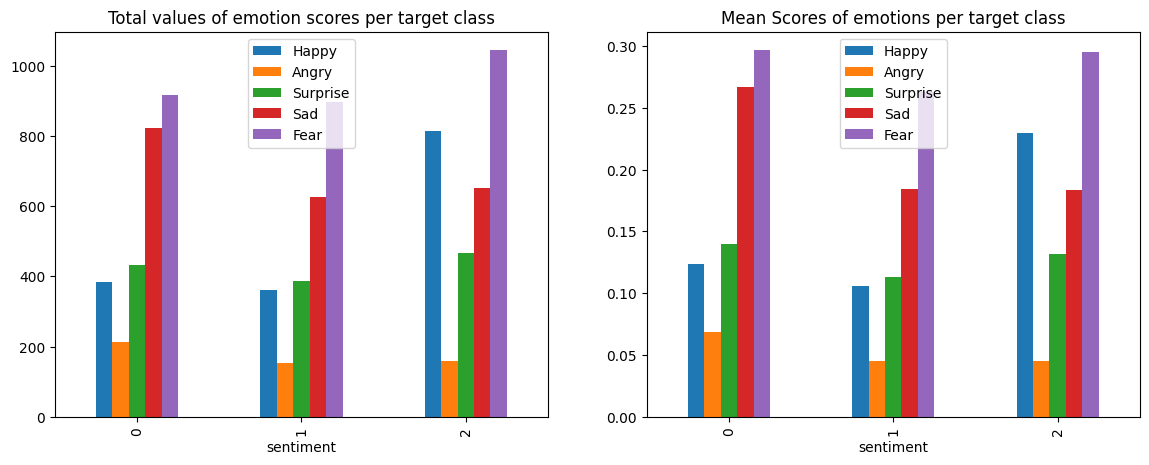

In [27]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
ax1 = total_emotions.plot(kind='bar', ax = axes[0])
ax1.set_title('Total values of emotion scores per target class')
ax2 = mean_emotions.plot(kind='bar', ax = axes[1])
ax2.set_title('Mean Scores of emotions per target class');

In [31]:
train_emo['Happy'] = np.clip(train_emo['Happy'], 1, 100)

In [32]:
train_emo['Happy'].value_counts()

Happy
1.0    10043
Name: count, dtype: int64